# WELCOME TO 6.058!

This semester we are going to use jupyter-notebooks. Notebooks are super awesome in that they allow us to focus on graphically displaying data and also allow us to execute code out of order if we want to do something funky.
Consider the segment of code below:

In [2]:
import numpy as np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

We can execute this segment of code by clicking on it and pressing control + enter. (if this throws an error then talk to me, your software is not installed correctly).

However, for most of the exercises in this course we won't be loading code one segment at a time. So, the first thing I am going to ask you to do in each notebook is to press cell up top and then Run All. This runs all code segments at the same time. Do that now!

In this course we are going to be using python with numpy and scipy in order to create a lot of our software to do signal processing. We are going to access our python knowledge below. If you can't perform any of these exercises please talk to me, we can get you up to speed super fast :) 

Write a function called squarer which uses a for loop in order to square all of the elements in the list of the input signal.

In [22]:
def squarer(inputsignal):
    for i in inputsignal:
        print(i**2)
print(squarer([0,1,2,3,4,5,6,7]))

0
1
4
9
16
25
36
49
None


Now do the same thing using a list comprehension

In [24]:
returned_squarer = [x**2 for x in range(8)]
print(returned_squarer)

[0, 1, 4, 9, 16, 25, 36, 49]


Create a numpy array of one's with length 18.
Sum all of the elements of the array. np.ones might be useful!

In [25]:
def onesandsum():
    return np.ones(18)
print(onesandsum())

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


There will be a lot of times when we have to plot data. We are going to have two ways of ploting things. 
First in using matplotlib.pyplot.plot https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

You can use this function using plt.plot() followed by plt.show()
Write a function below to do it with the supplies list of data

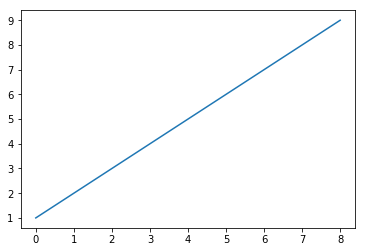

In [26]:
datalist = [1,2,3,4,5,6,7,8,9]
def plotdata(datalist):
    plt.figure()
    plt.plot(datalist)
    plt.show()
plotdata(datalist)

We can also using plt.imshow() to display data from a matrix.
Create a function below to display the given matrix

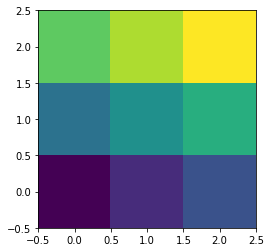

In [29]:
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])
def plotmatrix(matrix):
    plt.figure()
    plt.imshow(matrix,origin='lower')
    plt.show()
plotmatrix(matrix)

Finally we will be using IPyWidget interacts in this class to make our graphs and functions change on the fly. For example, consider this demo where we use a slider and plot that number:
NOTE: On most all plots I add a DPI slider (dots per inch) this is just to make the graphs bigger and smaller so that they can fit your screen size better.

In [30]:
def interactDemo(dpi=100,inputNum=2):
    plottable = [inputNum for x in range(10)]
    plt.figure(dpi)
    plt.ylim(ymin=0,ymax=11)
    plt.plot(plottable)
    plt.show()
interact(interactDemo,dpi=(70,300),inputNum=(1,10));

interactive(children=(IntSlider(value=100, description='dpi', max=300, min=70), IntSlider(value=2, description='inputNum', max=10, min=1), Output()), _dom_classes=('widget-interact',))

# Signals and Systems Content

Great, so we have covered some basics on how we are going to use the software. Let's dive into some content.

Today we are going to examine some basic syntax on what a signal and system are.
The first signal we are concerned with is the impulse (or delta) function: This is the plot of a delta function $\delta[n]$ (ignore the x-axis).

In [9]:
impulse = signal.unit_impulse(20,idx='mid')
def impulseDemo(dpi=100):
    plt.figure(dpi=dpi)
    plt.plot(impulse,'ro')
    plt.show()
interact(impulseDemo,dpi=(70,200));

interactive(children=(IntSlider(value=100, description='dpi', max=200, min=70), Output()), _dom_classes=('widget-interact',))

Great, we drew a pretty impulse, but what use is this?
First thing first, impulses are VERY useful for being able to model a general discrete signal.
For example, consider this simple signal:


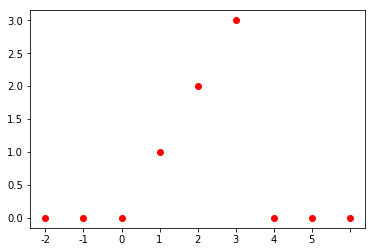

In [31]:
simplesignal = [0,0,0,1,2,3,0,0,0]
plt.figure()
fig, ax = plt.subplots()
plt.plot(simplesignal,'ro')
ax.set_xticklabels(range(-3,len(simplesignal)-3))
plt.show()

For this simple signal we could use the following notation to represent it:
$$\delta[n-1] + 2\delta[n-2] + 3\delta[n-3]$$

As a matter of fact, all discrete signals can be represented of the form:
$$ \text{signal}[n] = \sum_{i=\infty}^{\infty}a_{i}\delta[n-i]$$ where $a_{i}$ is the value at that position.

We will now have our first example of a homework exercise inside of the notebook.
We have two ways of doing homework in the course, exercises inside of the notebook using software and exercises in the form of psets. Some theory is pset done on pen and paper and the applied work is best done in software. We are going to use both to make sure you understand the material.

## Homework Exercise

Create a plot of the function $$5\delta[n-2] + 2\delta[n-3] + 0.5\delta[n-4] $$

In [11]:
def homework1():
    pass

In addition to being able to model discrete signals we will also use delta functions to characterize how systems perform. We will get into this later, but it is useful to keep in mind that this is INCREDIBLY useful.

The next signal we are going to consider is the unit step function, which looks like this:


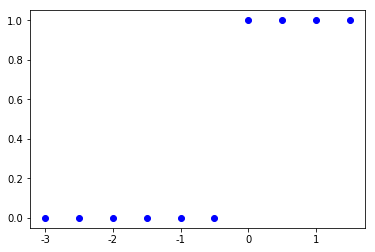

In [32]:
impulse = [1 if x > 0 else 0  for x in range(-5,5)]
plt.figure()
fig, ax = plt.subplots()
plt.plot(impulse,'bo')
ax.set_xticklabels(range(-4,len(impulse)-4))
plt.show()

So we now have the two most critical signals you will ever use. They are particularly useful when we seek to model systems. The impulse function we showed above can be throught of as an instant strike to the system in some way (mechanical systems getting hit by something, electrical systems exerience a voltage spike, chemical systems having a new reactant introduced etc). This is VERY useful as for a WIDE class of systems the impulse response is going to inform us of how the system will behave for ANY input that we can put into it!
The unit step response is another useful tool. You can think of it as a gust of wind hitting an airplane, a constant voltage offset in an electrical system, constant force in mechanical systems. Often times depending on the type of system creating an ideal impulse is difficult / measuring it is hard so we use the unit step to derive the same information. You will prove on the PSET (Problem 5) that the response from a unit step and the response from a unit impulse are relatable for a certain class of systems.

Great! We have tools to derive properties of systems. Now we just need to learn about what classes of systems we can use the properties on.

By far the easiest type of system is a Linear - Time Invarient System.
Linearity means that given the system f it obeys the following:
$$ f(a) + f(b) = f(a+b) $$
That is, the response of the system to two inputs seperatly is the same as the response to both at the same time.

For many systems this is a reasonable approximation, if I push a block twice as hard it accelerates twice as much.
For other systems it is not as reasonable, pushing someone on a swing twice as hard does not make them go twice as high.

Time Invarience means this:
$$ (x[n] \text{ results in  } y[n]) \text{  implies  } (x[n+k] \text{  result in  } y[n+k]) $$

This means that the system's response does not change over time. For almost all systems this is true (your airplane does not degrade in flight hopefully, your circuit does not change based on the seasons etc) however for some systems it is not true (chemical processes have plenty of examples of these).

Finally, one property that we will bring up in this class sparingly, causality:
A system is causal if its output at time t only depends on inputs from times t and before. As you can tell this is a really useless property in practice because everything is causal. If it were not causal then we would have figured out time travel. But for theory purposes sometimes we have to note that we are making the restriction to causal systems to make a proof work.

As a side note: we will start using the abreviation LTI instead of saying Linear - Time Invarient Systems.

So, now we will compute our first output from a system.

So, suppose we have a system of the form:
$$ y[n] = x[n] + 3x[n-1]$$
Create a plot of the impulse response of the system as well as the step response.

## Homework Exercise

In [13]:
def plotImpulseResponse():
    pass
plotImpulseResponse()

In [14]:
def plotStepResponse():
    pass
plotStepResponse()

So, it is very convenient for us to be able to write these systems by hand and solve them, but as they get more and more complex we will start to experience handaches from the computation. Thankfully we can have code take care of it for us. The below snippet of code is finding the impulse response of the system. The one afterwards finds the step response. Verify that your homework solutions match these plots.

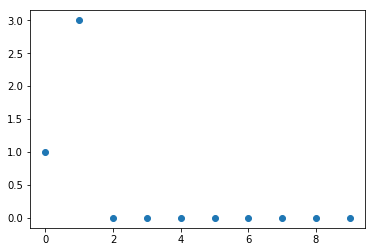

In [33]:
xs = [1,3,0]
ys = [1,0,0]
sys = signal.TransferFunction(xs, ys,dt=1.0)
tout,yout = signal.dimpulse(sys)
plt.figure()
plt.plot(tout[0:10],yout[0][0:10],'o')
plt.show()

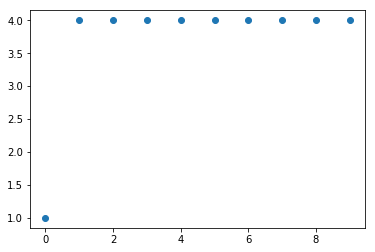

In [34]:
xs = [1,3,0]
ys = [1,0,0]
sys = signal.TransferFunction(xs, ys,dt=1.0)
tout,yout = signal.dstep(sys)
plt.figure()
plt.plot(tout[0:10],yout[0][0:10],'o')
plt.show()

So the impulse response looks how we think it should look :D
Can you use a similar piece of a code to make the step response for this system:
$$y[n] - y[n-1] = x[n] + x[n-1]$$
## Homework Exercise

In [17]:
def stepresponse2():
    pass
stepresponse2()

## Homework Exercise
Why does this output settle at 4? Think about what the interaction between $y[n]$ and $y[n-1]$ is.

WRITE ANSWER HERE

Consider the below system. You have a slider for tweaking r in the input.
The system looks like this:
$ y[n] - y[n-1] = x[n] + rx[n-1]$.

In [35]:
def impulseresponse2(r):
    xs = [1,r,0]
    ys = [1,-1,0]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    tout,yout = signal.dimpulse(sys)
    plt.figure()
    plt.ylim(ymin=-0.5,ymax=2)
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    
interact(impulseresponse2, r=(-1.0,1.0));

interactive(children=(FloatSlider(value=0.0, description='r', max=1.0, min=-1.0), Output()), _dom_classes=('widget-interact',))

We must also look at a step response and consider what it looks like.
Let's look at the step response of the following system:

In [36]:
def stepresponse3(r):
    xs = [1,r,0]
    ys = [1,-1,0]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    tout,yout = signal.dstep(sys)
    plt.figure()
    plt.ylim(ymin=-10,ymax=25)
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    
interact(stepresponse3, r=(-2.0,2.0));

interactive(children=(FloatSlider(value=0.0, description='r', max=2.0, min=-2.0), Output()), _dom_classes=('widget-interact',))

Cool! We now have some analysis tools that we can use. 
Let's do some modeling in order to use them on real systems.
First part, we are going to consider a heating system.
Now, heating systems often have some kind of thermal mass, $M$ and some loss $R$
We are going to model the system using the equation:
$$T_{Heater}[n] =  T_{Room}[n] + R \times M \times \frac{d T_{Room}[n]}{dt}$$
To figure out where this equation comes from, remember from thermo that Heat in = Heat out + Heat stored.

Finish the below function to find the impulse and step function of this model using $$R=1,M=5$$. What is a derivative in discrete time (if unsure look at the PSET)?

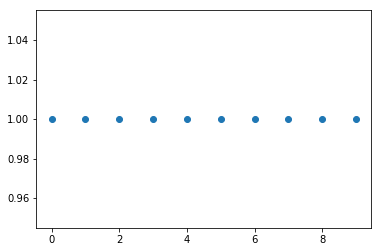

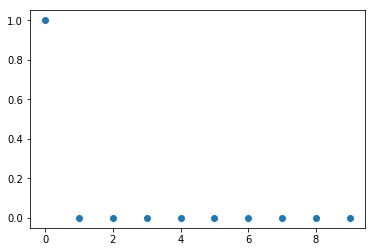

In [37]:
def temperaturemodel(R=1,M=5):
    xs = [1]
    ys = [1]
    sys = signal.TransferFunction(xs, ys,dt=1.0)
    iout,iyout = signal.dimpulse(sys)
    tout,yout = signal.dstep(sys)
    plt.figure()
    plt.plot(tout[0:10],yout[0][0:10],'o')
    plt.show()
    plt.figure()
    plt.plot(iout[0:10],iyout[0][0:10],'o')
    plt.show()
    
temperaturemodel()

## Homework Exercise

Solve the differential equation for continuous time. Does this match what the differential equation tells you for continuous time step and impulse response? Write the continious time impulse and step response equations here $$\text{impulse response equation}$$
$$\text{step response equation}$$

## Homework Exercise

Create a plot of the impulse and step responses you calculated by hand above

In [21]:
def temperatureImpulsePlot():
    pass

temperatureImpulsePlot()

## Thinking about non-LTI systems

So we have been thinking about LTI systems and their responses, but what about non-LTI systems?
In general, if something is not LTI then it can behave in many violent ways. For LTI systems in the abscene of an input there will always be a zero output. However for non-linear systems this does not hold true. In fact, for non-linear systems chaotic behavior can occur. Unfortunately right now we don't have the tools to start analyzing non-linear systems. The best we can do is to get the differentialy equations and solve them analytically / numerically. However, in lecture 7 of the course we will talk about the laplace transform, which can be used as a tool to start analyzing non-linear systems.